# Stock Market Data Analysis

In [29]:
#imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from __future__ import division
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import yfinance as yf

Retrieve the stock data for a pre-defined list of stocks for a one-period as it's a common timeframe for analyzing recent performance and volatility without being overly influenced by very old, potentially irrelevant market conditions.

In [30]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)
stock_data = {}

for stock in tech_list:
    data = yf.download(stock, start=start, end=end)
    globals()[stock] = data
    # print(f"{stock} data. Head:\n", data.head(), "\n")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [31]:
AAPL.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-06-20,208.703964,213.242751,207.877841,212.934181,86172500
2024-06-21,206.524155,210.903667,206.145919,209.410649,246421400
2024-06-24,207.171143,211.709914,205.628355,206.753099,80727000
2024-06-25,208.096817,210.396062,207.638952,208.176431,56713900
2024-06-26,212.257339,213.859846,209.659488,210.515486,66213200


Display descriptive statistics for the numerical columns

In [32]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,222.871562,225.154405,220.227332,222.581169,5.438030e+07
std,15.386980,14.849359,15.748747,15.454853,2.990779e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,212.541088,214.393190,209.668371,212.178497,3.953412e+07
50%,224.210579,226.070020,222.231372,224.170648,4.711600e+07
75%,232.515671,234.263584,229.182156,232.447929,5.932100e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


Give concise summary of the DataFrame including data types of each column.

In [33]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-06-20 to 2025-06-18
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


### Closing Price

To visualize the historical performance and trend of Apple's stock over the past year. It allows us to quickly identify periods of growth, decline, and volatility.

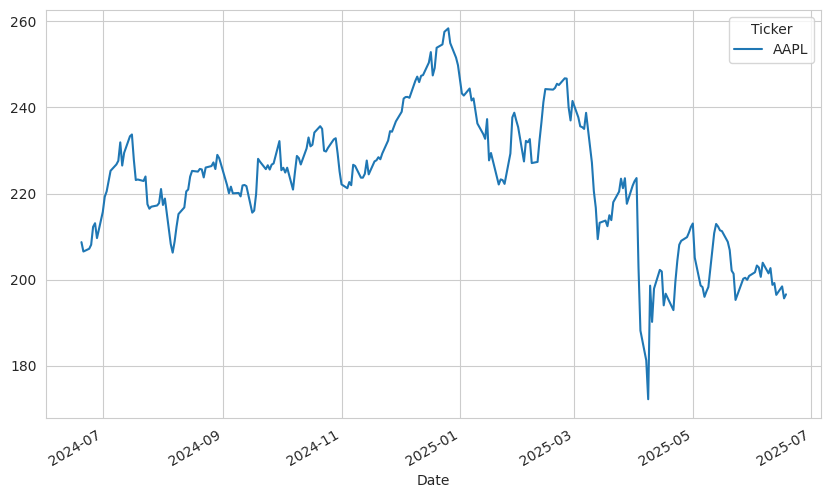

In [34]:
AAPL['Close'].plot(legend=True, figsize = (10,6))
plt.show()

### Volume Traded

To analyze trading activity. Spikes in volume often coincide with major price movements, earnings announcements, or significant news, indicating high market interest.

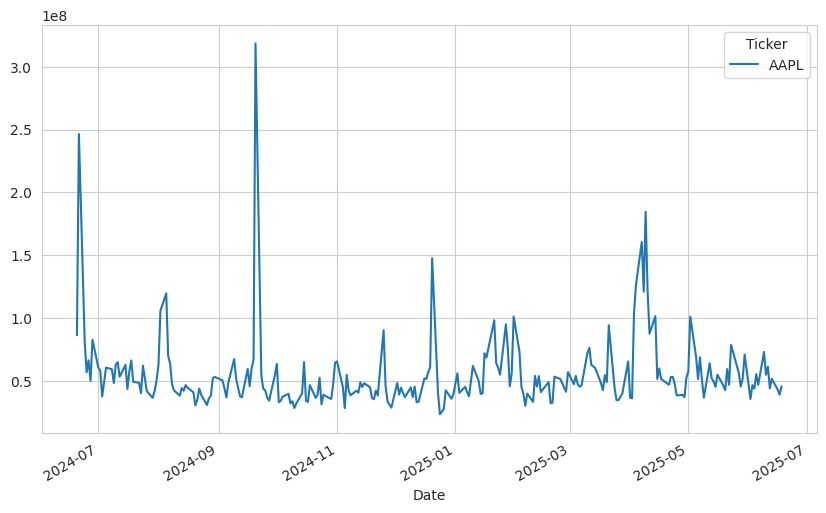

In [35]:
AAPL["Volume"].plot(legend=True,figsize=(10,6))
plt.show()

### Moving Average (MA)

Moving Average(MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out "noise" from random price fluctuations. This technique is widely used in technical analysis to identify trend direction and potential buy/sell signals (e.g., when a short-term MA crosses a long-term MA).

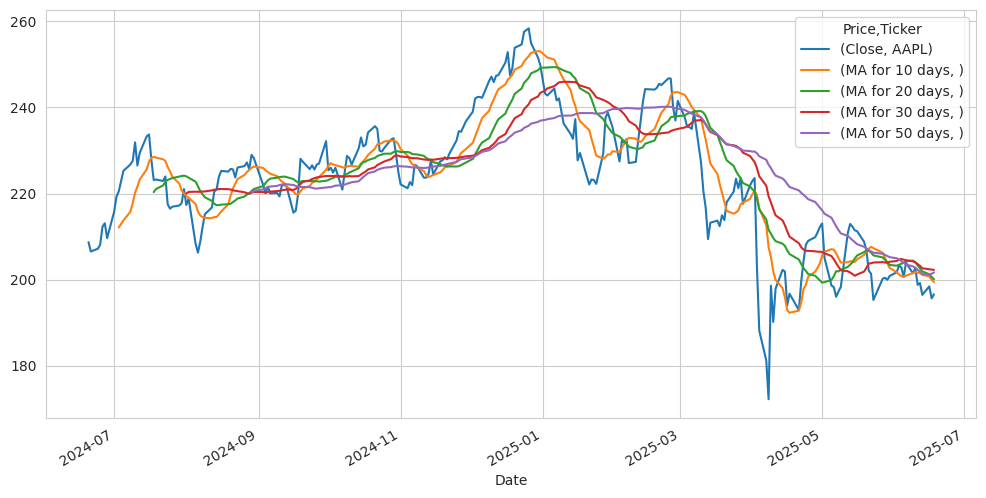

In [36]:
ma_day = [10, 20, 30 , 50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.DataFrame.rolling(AAPL['Close'],ma).mean()


AAPL[['Close', 'MA for 10 days','MA for 20 days','MA for 30 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

### Daily Return Analysis

Now, we will analyze the risk of stock and in order to do so, we need take a closer look at the daily changes of the stock and not just the absolute values.


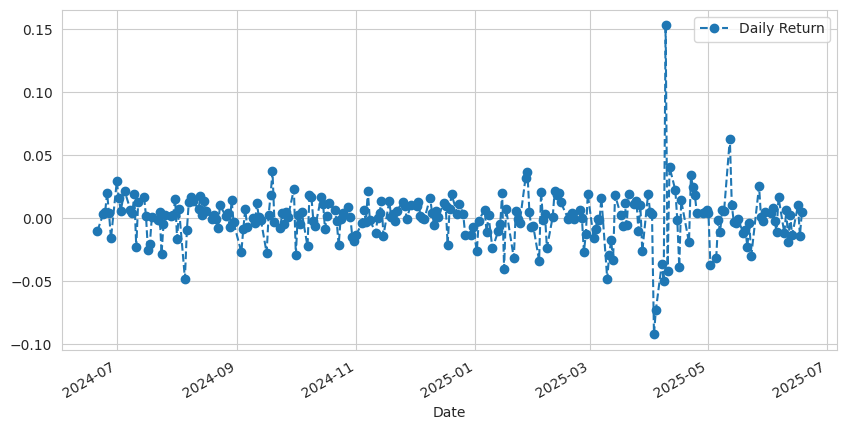

In [37]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,5),legend=True, linestyle='--',marker='o')
plt.show()

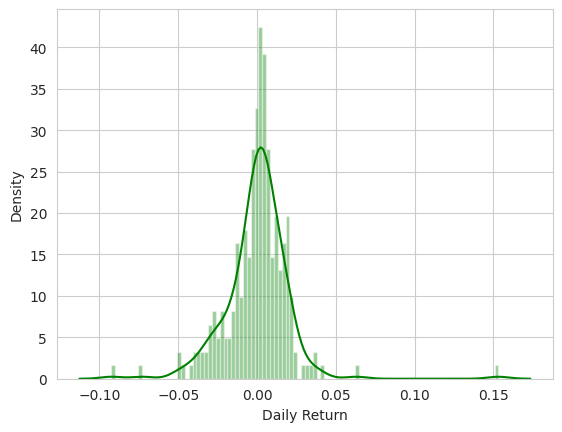

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color="green")
plt.show()

 This helps us understand the nature of the stock's risk. We can see the most common daily return (the peak of the histogram, usually near zero) and how often extreme returns occur (the "tails" of the distribution). The shape is often compared to a normal distribution.


Let's analyze the returns of all the stocks in our ```tech_list```.

In [39]:
closing_df1 = pd.DataFrame(AAPL["Close"])
Close1 = closing_df1.rename(columns={"Close": "AAPL_Close"})

closing_df2 = pd.DataFrame(GOOG["Close"])
Close2 = closing_df2.rename(columns={"Close": "GOOG_Close"})

closing_df3 = pd.DataFrame(MSFT["Close"])
Close3 = closing_df3.rename(columns={"Close": "MSFT_Close"})

closing_df4 = pd.DataFrame(AMZN["Close"])
Close4 = closing_df4.rename(columns={"Close": "AMZN_Close"})

closing_df = pd.concat([Close1, Close2, Close3, Close4], axis=1)
closing_df.head()

Ticker,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-06-20,208.703964,176.860947,442.308838,186.100006
2024-06-21,206.524155,179.398758,446.357819,189.080002
2024-06-24,207.171143,179.926208,444.263855,185.570007
2024-06-25,208.096817,184.693329,447.518890,186.339996
2024-06-26,212.257339,184.484314,448.719696,193.610001


This creates our primary dataset for comparative analysis. Now, each row represents a day, and each column represents a stock's daily return, making it easy to see how they performed relative to each other on any given day.



In [40]:
tech_returns = closing_df.pct_change()


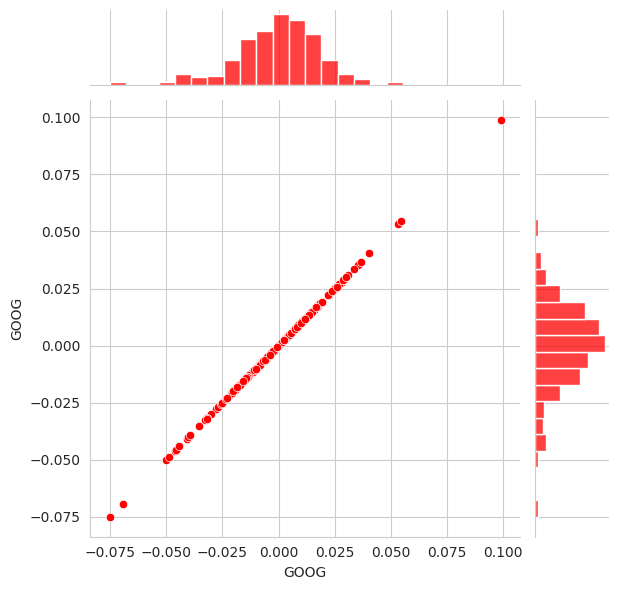

In [41]:
sns.jointplot(
    x="GOOG", y="GOOG", data=tech_returns, kind="scatter", color="red", legend=True
)
plt.show()

It allows us to see all pairwise correlations at a glance. The diagonal shows the distribution of each stock's returns (like the histogram we made earlier), and the off-diagonal plots are scatter plots showing the correlation between pairs of stocks. Upward-sloping scatter plots indicate a positive correlation (when one goes up, the other tends to go up).

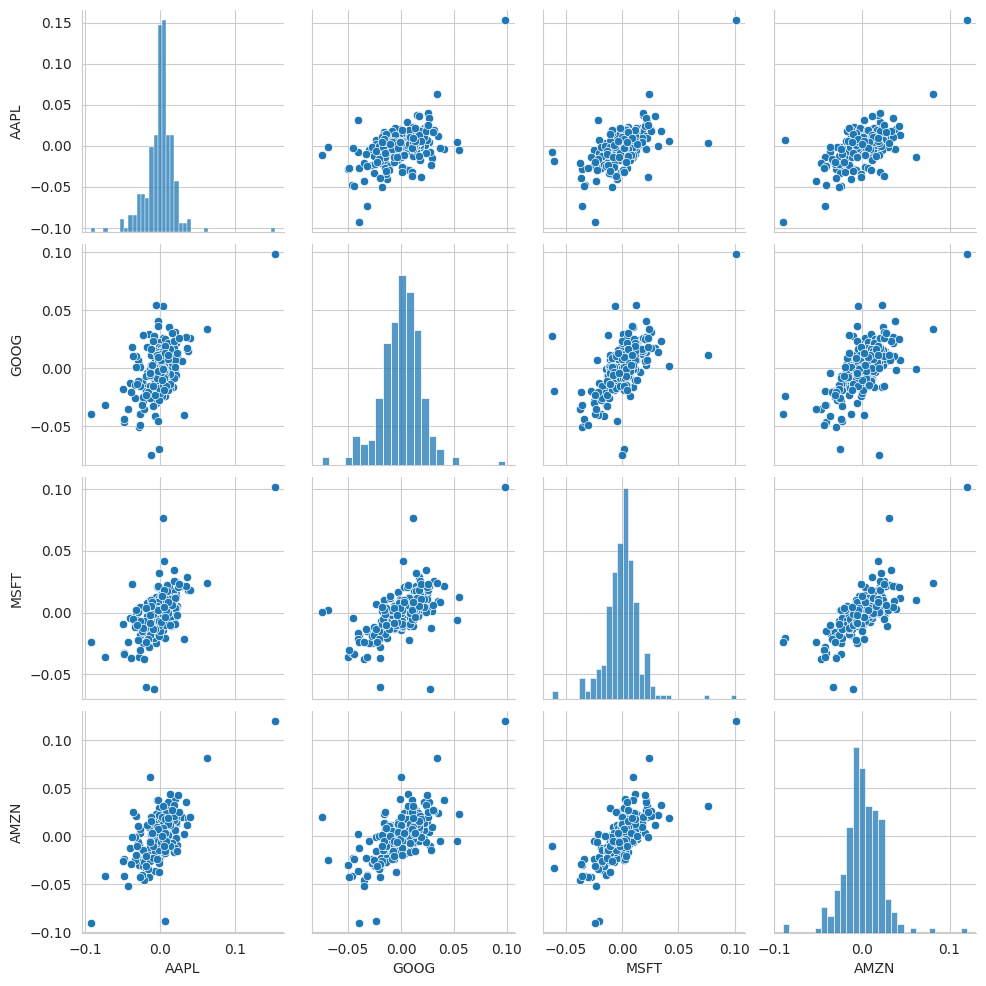

In [42]:
sns.pairplot(tech_returns.dropna())
plt.show()

The following gives us a control over what plot we want in the diagonal, upper triangle and the lower triangle.  It combines three different views: the direct correlation (scatter), the density of the correlation (KDE), and the individual distribution (histogram), giving a more complete picture of the relationships between the stocks' returns.

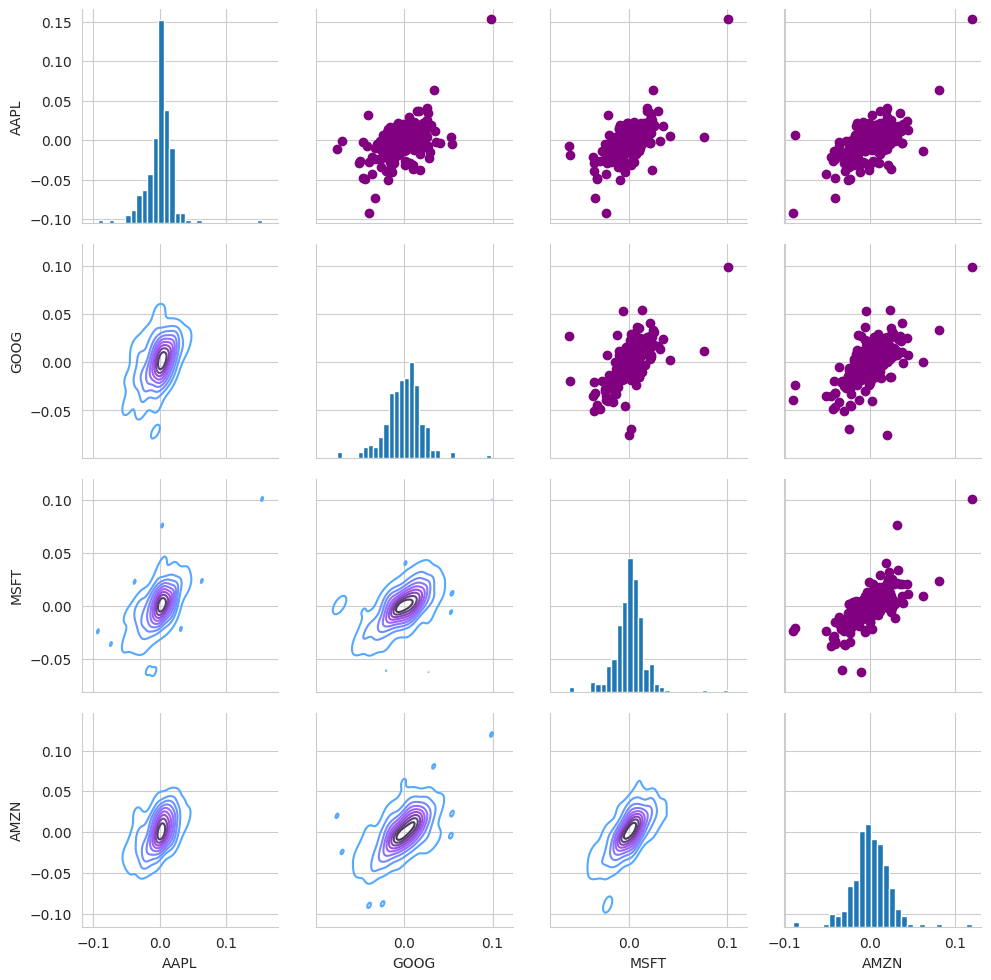

In [43]:
# to ignore warnings
import warnings

warnings.filterwarnings("ignore")
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_returns.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter, color="purple")

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot, cmap="cool_d")

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist, bins=30)


plt.show()

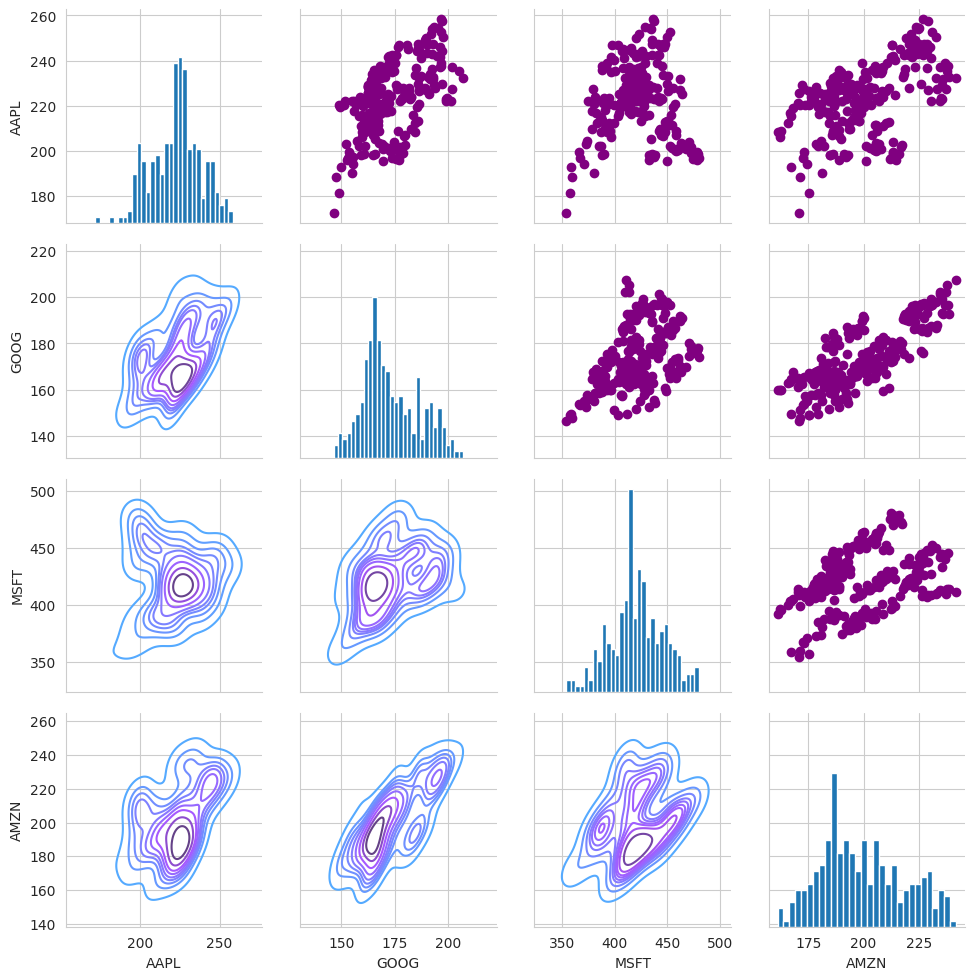

In [44]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap="cool_d")

returns_fig.map_diag(plt.hist,bins=30)

plt.show()

### Correlation Plot

While the pairplot shows the relationships visually, the heatmap quantifies them. The correlation coefficient (from -1 to 1) gives a precise measure of how strongly two stocks' returns move together. This is critical for portfolio management and diversification, as combining assets with low correlation can reduce overall portfolio risk.

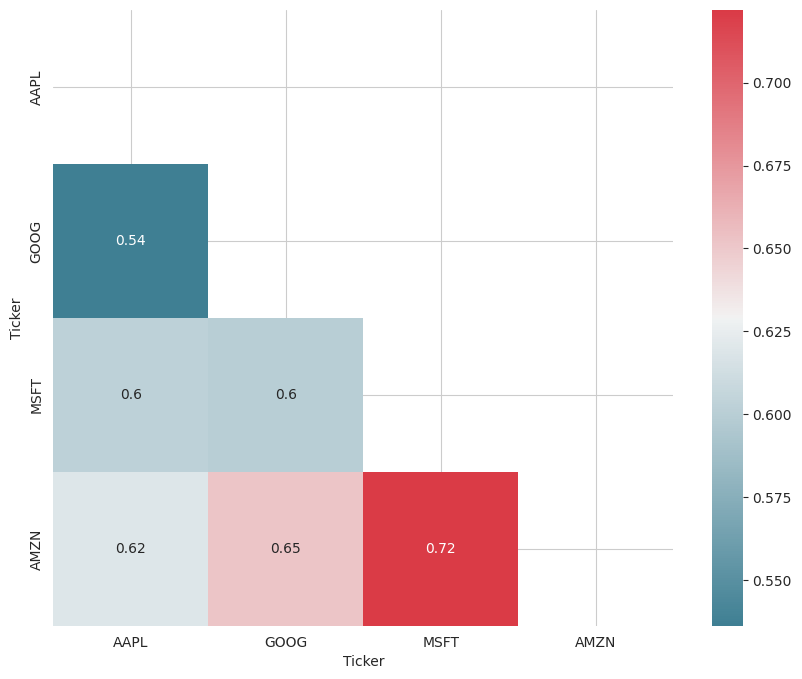

In [45]:
corr = tech_returns.dropna().corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig,ax = plt.subplots(figsize=(10,8))

cmap = sns.diverging_palette(220,10,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,annot=True)

plt.show()

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


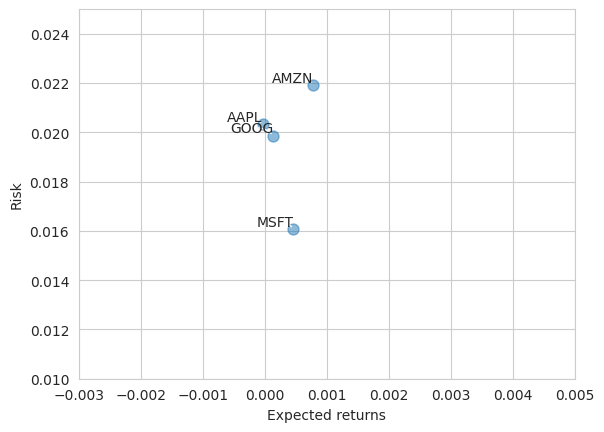

In [46]:
rets = tech_returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')

plt.ylim([0.01,0.025])

plt.xlim([-0.003,0.005])

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy = (x,y),xytext=(x + 0.0005, y + 0.0005),
        textcoords= 'offset points' , ha= 'right', va='bottom',
        arrowprops=dict(arrowstyle='-', connectionstyle='arc3,rad=-0.3'))

#### Value at risk using the "bootstrap" method

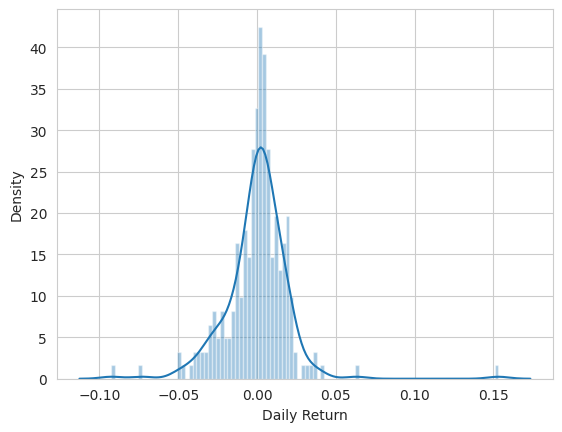

In [47]:
sns.distplot(AAPL["Daily Return"].dropna(), bins=100)
plt.show()

In [48]:
rets.head()

Ticker,AAPL,GOOG,MSFT,AMZN
Date,,,,
2024-06-21,-0.010445,0.014349,0.009154,0.016013
2024-06-24,0.003133,0.002940,-0.004691,-0.018564
2024-06-25,0.004468,0.026495,0.007327,0.004149
2024-06-26,0.019993,-0.001132,0.002683,0.039015
2024-06-27,0.003986,0.008038,0.001526,0.021900


 This finds the value below which 5% of the daily returns in the past year have fallen. This is a simple, non-parametric method to estimate Value at Risk (VaR). The result answers the question: "Based on historical data, what is the daily loss that we can be 95% confident we will not exceed?" It's a quick way to quantify downside risk.

In [49]:
emp = rets["AAPL"].quantile(0.05)
print("The 0.05 empirical quantile of daily returns is at", emp)

The 0.05 empirical quantile of daily returns is at -0.031732896183236534


### Value at Risk using the Monte Carlo Method

A Monte Carlo simulation allows us to model a vast number of possible future outcomes. Plotting 100 runs visualizes the randomness and the range of potential future prices. It shows that while the future is uncertain, the outcomes are constrained by the underlying statistical properties (mu and sigma) of the stock.

In [50]:
days = 365

deltaT = 1/days

mu = rets.mean()['GOOG']

sigma = rets = rets.std()['GOOG']

In [51]:
def monte_carlo_simulation(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0]= start_price

    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*deltaT,scale=sigma*np.sqrt(deltaT))
        drift[x] = mu*deltaT
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price

In [52]:
GOOG.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2024-06-20,176.860947,177.886024,175.616919,175.865724,16753200
2024-06-21,179.398758,181.639997,177.209272,177.637225,59728000
2024-06-24,179.926208,181.210054,179.368887,180.413873,18198300
2024-06-25,184.693329,184.862515,180.239704,180.279521,18917700
2024-06-26,184.484314,185.041636,183.110918,183.319906,13375700


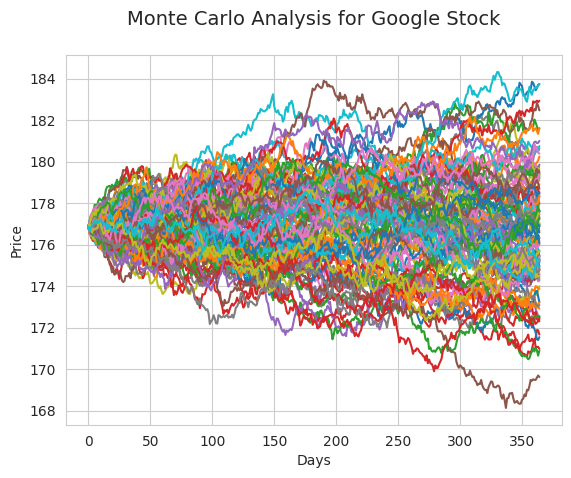

In [53]:
start_price = 176.860947

for run in range(100):
    plt.plot(monte_carlo_simulation(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Monte Carlo Analysis for Google Stock\n", fontsize=14)
plt.show()

We run a large number of simulations (10,000) to create a robust statistical distribution of possible ending prices. We only care about the final price because VaR is typically concerned with the value of the asset at the end of a specific time horizon.

In [54]:

runs = 10000

simulations = np.zeros(runs)
np.set_printoptions(threshold=5)

for run in range(runs):
    simulations[run] = monte_carlo_simulation(start_price, days, mu, sigma)[days - 1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days\n')

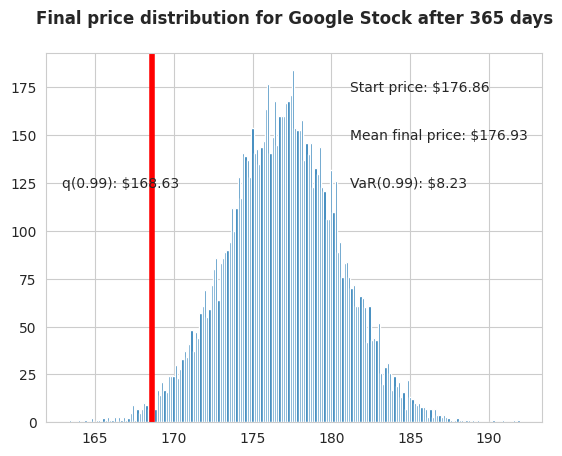

In [55]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" % start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color="r")

plt.title(
    "Final price distribution for Google Stock after %s days\n" % days, weight="bold"
)

This is the culmination of the Monte Carlo analysis. The histogram shows the full range of what the model predicts could happen to Google's stock in a year. The 1st percentile (q) provides a specific, quantitative measure of risk. The final output answers the question: "According to our model, what is the stock price level such that there is only a 1% chance of the stock finishing below it in one year?" This provides a much more forward-looking and model-driven estimate of risk than the simple historical method.